In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/SeoulBikeData.csv', encoding='unicode_escape')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   int64         
 12  holiday                8760 non-null   int64         
 13  day

In [34]:
df.shape

(8760, 17)

In [37]:
df.isna().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
day                      0
month                    0
year                     0
weekday                  0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,8760,2018-05-31 23:59:59.999999744,2017-12-01 00:00:00,2018-03-02 00:00:00,2018-06-01 00:00:00,2018-08-31 00:00:00,2018-11-30 00:00:00,NaN
rented_bike_count,8760.0,704.602055,0.0,191.0,504.5,1065.25,3556.0,644.997468
hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
temperature,8760.0,12.882922,-17.8,3.5,13.7,22.5,39.4,11.944825
humidity,8760.0,58.226256,0.0,42.0,57.0,74.0,98.0,20.362413
wind_speed,8760.0,1.724909,0.0,0.9,1.5,2.3,7.4,1.0363
visibility,8760.0,1436.825799,27.0,940.0,1698.0,2000.0,2000.0,608.298712
dew_point_temperature,8760.0,4.073813,-30.6,-4.7,5.1,14.8,27.2,13.060369
solar_radiation,8760.0,0.569111,0.0,0.0,0.01,0.93,3.52,0.868746
rainfall,8760.0,0.148687,0.0,0.0,0.0,0.0,35.0,1.128193


In [57]:
df.weekday.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [30]:
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df["day"] = df['date'].dt.day
df["month"] = df['date'].dt.month
df["year"] = df['date'].dt.year
df["weekday"] = df['date'].dt.day_name()

In [58]:
df['seasons'] = df['seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df['holiday'] = df['holiday'].map({"No Holiday": 0, "Holiday": 1})
df['weekday'] = df['weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [18]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)\s*", "", regex=True)
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [16]:
df.columns = [x.lower() for x in df.columns]

In [23]:
df=df.drop(['functioning_day'], axis = 1)

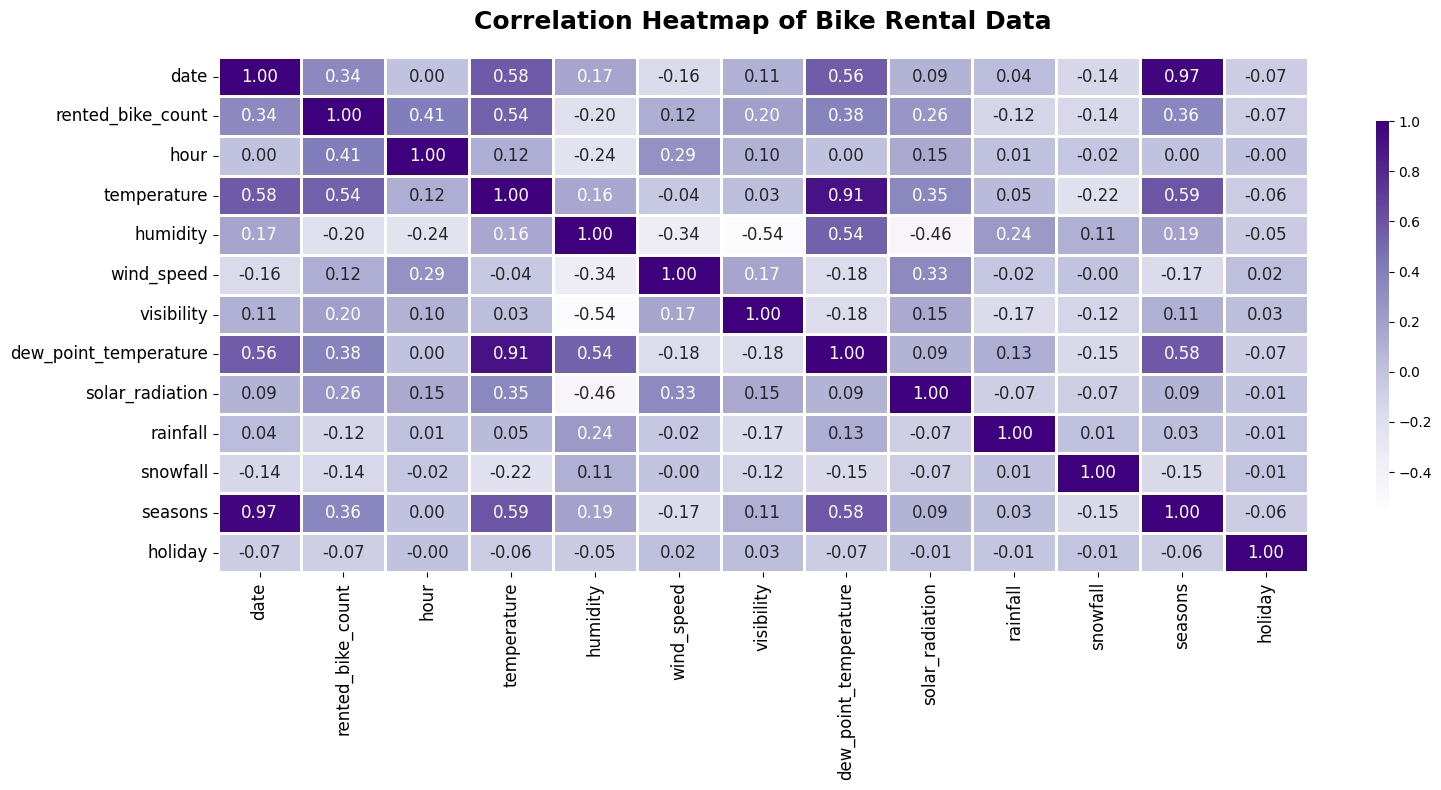

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(df.corr(), 
            annot=True, 
            fmt='1.2f', 
            annot_kws={'size': 12},
            linewidths=1, 
            linecolor='white',
            cmap='Purples',
            cbar_kws={"shrink": 0.75, "aspect": 30})

plt.title('Correlation Heatmap of Bike Rental Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()

plt.show()

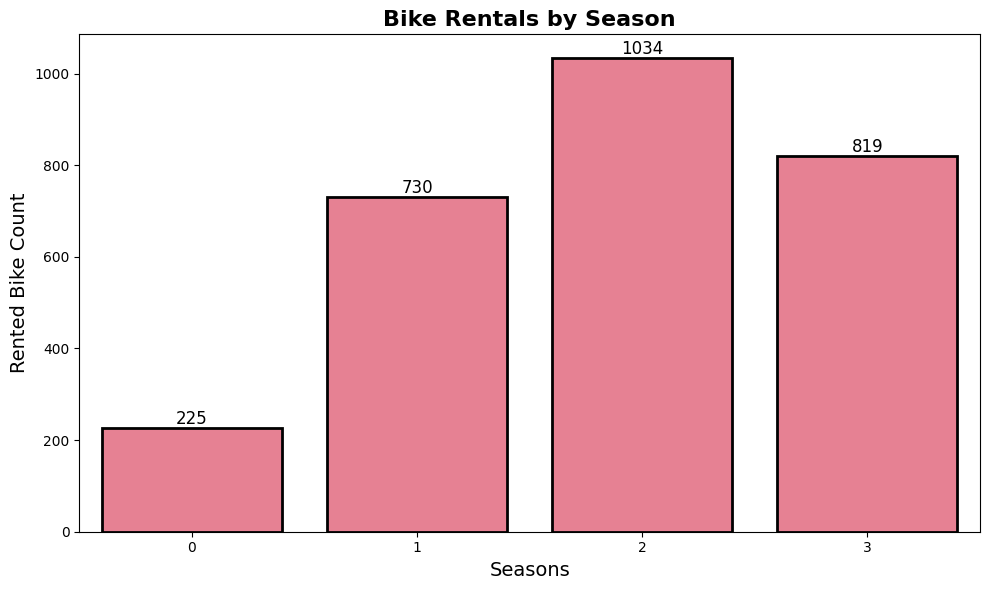

In [26]:
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

ax = sns.barplot(x="seasons", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Season", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

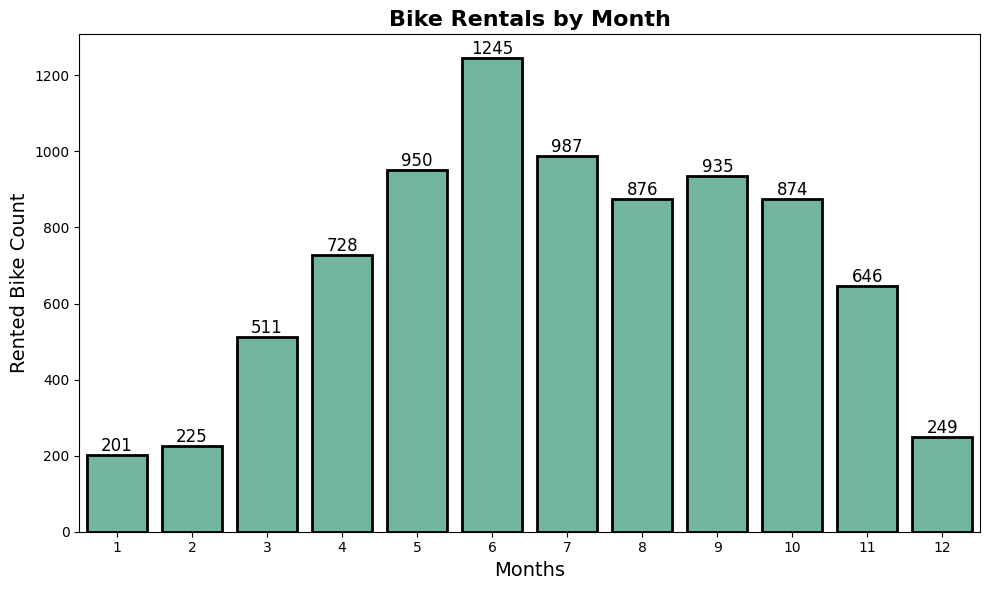

In [31]:
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

ax = sns.barplot(x="month", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Month", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

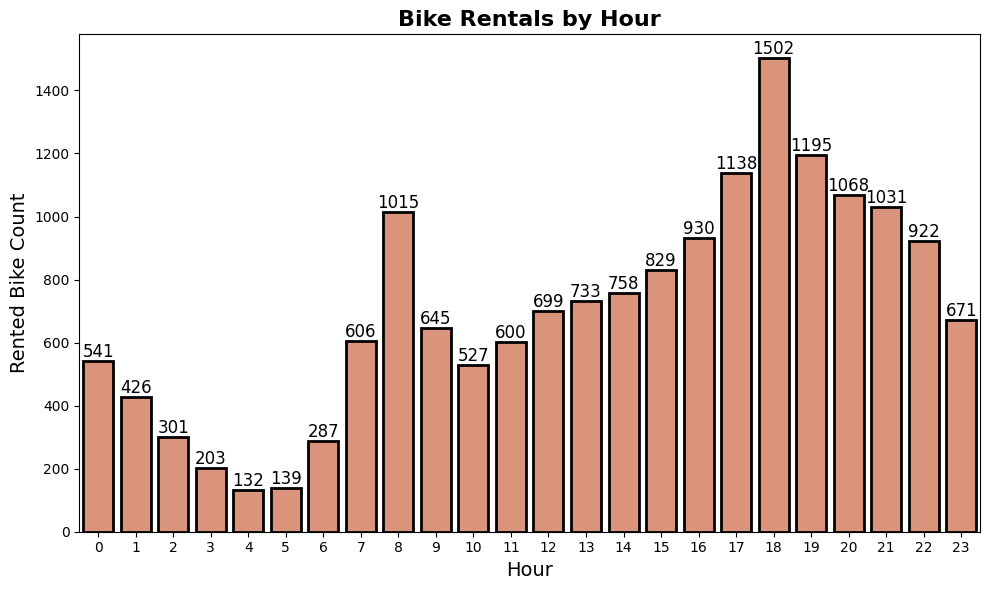

In [32]:
plt.figure(figsize=(10, 6))
sns.set_palette("flare")

ax = sns.barplot(x="hour", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

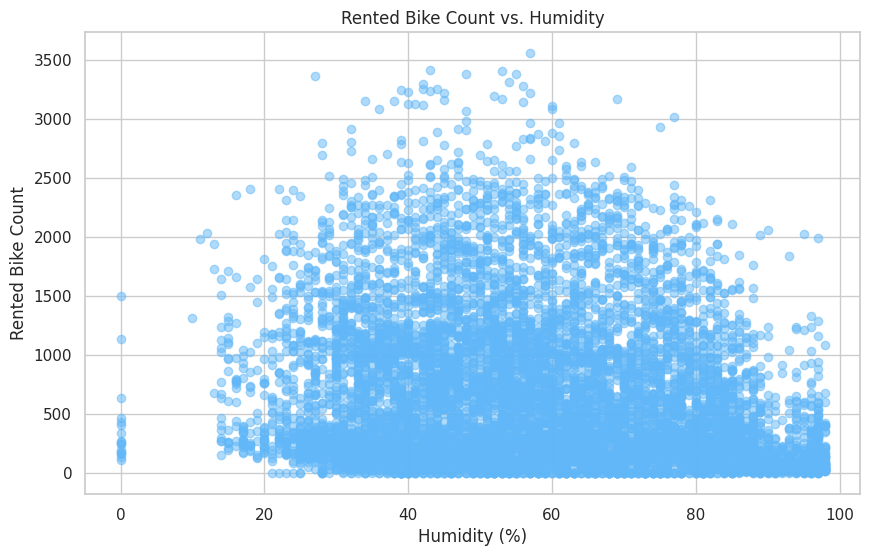

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['rented_bike_count'], c="#61b7f7", alpha=0.5)
plt.title('Rented Bike Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

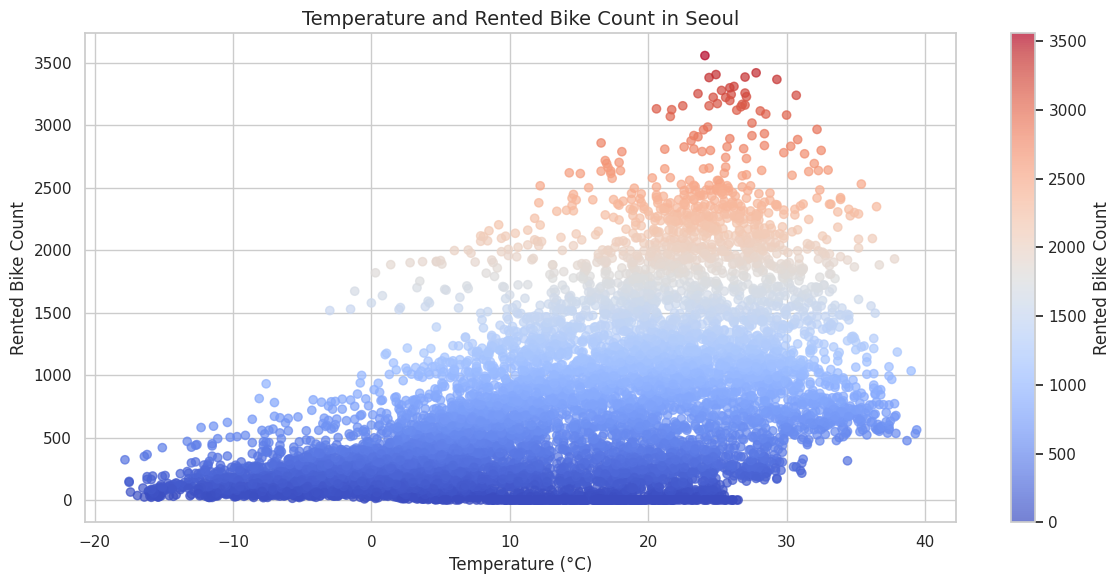

In [33]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

scatter = plt.scatter(x=df['temperature'], y=df['rented_bike_count'], 
                      c=df['rented_bike_count'], cmap='coolwarm', alpha=0.7)

plt.title('Temperature and Rented Bike Count in Seoul', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

plt.colorbar(scatter, label='Rented Bike Count')

plt.tight_layout()
plt.show()

In [75]:
corr = df.corr()
features = corr["rented_bike_count"]
significant_features = features[features.abs() > 0.2]

In [76]:
significant_features

date                     0.340772
rented_bike_count        1.000000
hour                     0.410257
temperature              0.538558
dew_point_temperature    0.379788
solar_radiation          0.261837
year                     0.215162
Name: rented_bike_count, dtype: float64